In [81]:
# Code that aggregates all the Bunch data into a single np array for further processing
import matplotlib.pyplot as plt
import numpy as np
import sys,os

# relative path to where Bunch data is stored as .csv files
base_path = "../build/data"
# preappend to each file
preappend = ""
# number of turns simulation was performed at
nturns = 10
# number of bunches simulated
nbunches= 1320
# number of particles per bunch simulatated
nparticles = 2000
# number of coordinates in consideration
#  - Tau: 0
#  - Delta: 1
#  - X: 2
#  - PX: 3
#  - Y: 4
#  - PY: 5
ncoordinates = 6
# final output containing data. 
Bunch_data = np.zeros((nturns,nbunches,nparticles,ncoordinates))

In [82]:
def read_Bunch_data(path_name,nparticles, ncoordinates, sep=','):
# function to read in data from a single bunch and place in a numpy array
    try:
        with open(path_name,'r') as f:
            dump = f.readlines()
    except:
        msg = path_name+" doesn't exist"
        sys.exit(msg)
    output = np.zeros((nparticles,ncoordinates))
    # ignore first line since those are column names
    index = 0
    for line in dump[1:]:
        split = line.split(',')
    # replace linebreak in last character slot
        split[-1] = split[-1].replace('\n','')
    # convert string to floats
        split = [float(x) for x in split]
    # assign particle to array
        output[index,:] = split
        index += 1
    return output

# Example of using read_Bunch_data
# read_Bunch_data(base_path+"/_Bunch_0_turn_0.csv",nparticles, ncoordinates)

In [83]:
def generate_filepath(base_path,bunch_id, turn_number, preappend=""):
    fname = preappend+"_Bunch_"+str(bunch_id)+"_turn_"+str(turn_number)+".csv"
    return os.path.join(base_path,fname)
# Example function call to generate path to bunch data
# generate_filepath(base_path,10,20)

In [92]:
for bunch in range(0,nbunches):
    for turn in range(0,nturns):
        fpath = generate_filepath(base_path,bunch,turn,preappend)
        bdata = read_Bunch_data(fpath,nparticles, ncoordinates)
        Bunch_data[turn,bunch,:,:] = bdata
print("Finished")
# indicies of Bunch_data: turns, bunch, particle, coordinate
# at this point, you could save this to disk via np.save() function, or you can use as is (see below)

Finished


In [10]:
Bunch_data.shape

(5, 1320, 2000, 6)

(array([  1.,   1.,   1.,   1.,   0.,   7.,   3.,   4.,   6.,   7.,   9.,
         12.,  16.,  17.,  21.,  28.,  39.,  40.,  46.,  60.,  54.,  68.,
        108., 133., 154., 270., 179., 107., 108.,  98.,  82.,  64.,  34.,
         39.,  38.,  28.,  24.,  22.,  13.,  11.,  11.,   9.,   6.,   9.,
          1.,   5.,   2.,   1.,   1.,   1.,   1.]),
 array([-43.2063    , -41.51800588, -39.82971176, -38.14141765,
        -36.45312353, -34.76482941, -33.07653529, -31.38824118,
        -29.69994706, -28.01165294, -26.32335882, -24.63506471,
        -22.94677059, -21.25847647, -19.57018235, -17.88188824,
        -16.19359412, -14.5053    , -12.81700588, -11.12871176,
         -9.44041765,  -7.75212353,  -6.06382941,  -4.37553529,
         -2.68724118,  -0.99894706,   0.68934706,   2.37764118,
          4.06593529,   5.75422941,   7.44252353,   9.13081765,
         10.81911176,  12.50740588,  14.1957    ,  15.88399412,
         17.57228824,  19.26058235,  20.94887647,  22.63717059,
         24.

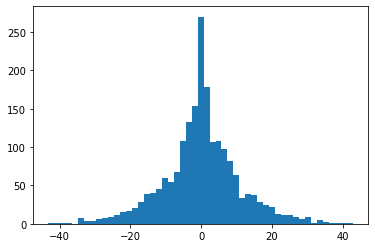

In [102]:
# Example usage of Bunch_data: printing out tau distribution of first turn of first bunch
tau_data = Bunch_data[0,0,:,4]
plt.hist(tau_data,bins="auto")

#### Initial bunch configuration calculated prior to simulation


(array([ 45.,  59.,  91., 109., 105., 149., 143., 137., 155., 167., 159.,
        171., 129., 107.,  99.,  78.,  56.,  41.]),
 array([-4.99421   , -4.44030278, -3.88639556, -3.33248833, -2.77858111,
        -2.22467389, -1.67076667, -1.11685944, -0.56295222, -0.009045  ,
         0.54486222,  1.09876944,  1.65267667,  2.20658389,  2.76049111,
         3.31439833,  3.86830556,  4.42221278,  4.97612   ]),
 <BarContainer object of 18 artists>)

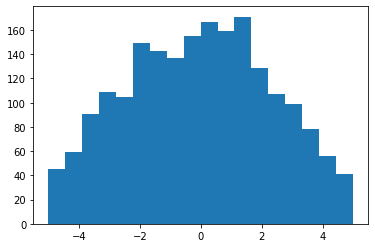

In [80]:
initial_b = read_Bunch_data("./build/InitialDistBunch0.csv",nparticles, ncoordinates)
tau_data = initial_b[:,2]
plt.hist(tau_data,bins="auto")